여러 데이터 셋에서 공통되는 클래스 통합하여 pickle로 만드는 코드

# HAR Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-e34nv19a because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Data Load

In [3]:
data1 = './pickle/SBHAR/SBHAR_class12_len100_pub_23.pickle'
data2 = './pickle/PAMAP2/All_DS_class12_len100_pub_23.pickle'
data3 = './pickle/MotionSense/MotionSense_class6_len100_pub_23.pickle'
data4 = './pickle/KU-HAR/KU-HAR_DS_class7_len100_pub_23.pickle'

In [4]:
data = [data1, data2, data3, data4]
datan = ['SBHAR', 'PAMAP2', 'MotionSense', 'KU-HAR']
classn = ['walking', 'standing', 'sitting', 'upstairs', 'downstairs', 'lying', 'running']

In [5]:
data_training = [[] for i in range(len(data))]
data_test = [[] for i in range(len(data))]
class_name_pub = [[] for i in range(len(data))]
feature_name = [[] for i in range(len(data))]
sz_train = [[] for i in range(len(data))]
sz_test = [[] for i in range(len(data))]

for i in range(len(data)):
    print('-----------------------------------------------------------------')
    print('load from [{}] pickle files...'.format(data[i].split('/')[2]))
    data_file = open('{}'.format(data[i]), 'rb')
    datasave = pickle.load(data_file)
    data_file.close()

    data_training[i] = datasave[0]
    data_test[i] = datasave[2]
    class_name_pub[i] = datasave[4]
    feature_name[i] = datasave[5]
    sz_train[i] = datasave[7]
    sz_test[i] = datasave[8]
    print(np.shape(data_training[i]))
    print(np.shape(data_test[i]))
    print(class_name_pub[i])
    print(feature_name[i])
    print(sz_train[i])
    print(sz_test[i])

-----------------------------------------------------------------
load from [SBHAR] pickle files...
(6036, 100, 6)
(1515, 100, 6)
['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING', 'STAND_TO_SIT', 'SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']
['acc_x', 'acc_y', 'acc_z', 'ang_x', 'ang_y', 'ang_z']
[929, 863, 785, 969, 1053, 1049, 59, 43, 76, 61, 90, 59]
[233, 216, 197, 243, 264, 263, 15, 11, 19, 16, 23, 15]
-----------------------------------------------------------------
load from [PAMAP2] pickle files...
(7731, 100, 18)
(1938, 100, 18)
['lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic_walking', 'ascending_stairs', 'descending_stairs', 'vacuum_cleaning', 'ironing', 'rope_jumping']
['hacc_x', 'hacc_y', 'hacc_z', 'hang_x', 'hang_y', 'hang_z', 'cacc_x', 'cacc_y', 'cacc_z', 'cang_x', 'cang_y', 'cang_z', 'aacc_x', 'aacc_y', 'aacc_z', 'aang_x', 'aang_y', 'aang_z']
[767, 737, 755, 952, 391, 655, 749, 465

In [6]:
combine_class = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING',
                'lying', 'sitting', 'standing', 'walking', 'running','ascending_stairs', 'descending_stairs',
                'down_stairs', 'up_stairs', 'jogging', 'upstairs', 'downstairs']

In [7]:
np.shape(data_training[0])

(6036, 100, 6)

### 데이터 통합

In [9]:
train_data = [[] for k in range(len(data))]
test_data = [[] for k in range(len(data))]
class_data = [[] for k in range(len(data))]

for i in range(len(data)):  
    print('------------------------------------', i, datan[i])
    train_data_split = []
    test_data_split = []
    class_name_split = []
    start1,end1,start2,end2 = 0, 0, 0, 0
    for j in range(len(class_name_pub[i])):
        end1 += sz_train[i][j]
        end2 += sz_test[i][j]
        #print(start,'---',end)
        temp_train = data_training[i][start1:end1]
        temp_test = data_test[i][start2:end2]
        #print(np.shape(temp_train), np.shape(temp_test))
        if class_name_pub[i][j] in combine_class:
            print(j,'--',class_name_pub[i][j])
            print(np.shape(temp_train))
            train_data_split.append(temp_train)
            test_data_split.append(temp_test)
            class_name_split.append(class_name_pub[i][j])
        start1 = end1
        start2 = end2
    train_data[i].append(train_data_split)
    test_data[i].append(test_data_split)
    class_data[i].append(class_name_split)

------------------------------------ 0 SBHAR
0 -- WALKING
(929, 100, 6)
1 -- WALKING_UPSTAIRS
(863, 100, 6)
2 -- WALKING_DOWNSTAIRS
(785, 100, 6)
3 -- SITTING
(969, 100, 6)
4 -- STANDING
(1053, 100, 6)
5 -- LAYING
(1049, 100, 6)
------------------------------------ 1 PAMAP2
0 -- lying
(767, 100, 18)
1 -- sitting
(737, 100, 18)
2 -- standing
(755, 100, 18)
3 -- walking
(952, 100, 18)
4 -- running
(391, 100, 18)
7 -- ascending_stairs
(465, 100, 18)
8 -- descending_stairs
(417, 100, 18)
------------------------------------ 2 MotionSense
0 -- down_stairs
(1045, 100, 6)
1 -- up_stairs
(1249, 100, 6)
2 -- walking
(2746, 100, 6)
3 -- jogging
(1064, 100, 6)
4 -- standing
(2440, 100, 6)
5 -- sitting
(2700, 100, 6)
------------------------------------ 3 KU-HAR
0 -- standing
(2420, 100, 6)
1 -- sitting
(2182, 100, 6)
2 -- lying
(2108, 100, 6)
3 -- walking
(1203, 100, 6)
4 -- running
(584, 100, 6)
5 -- upstairs
(975, 100, 6)
6 -- downstairs
(1003, 100, 6)


In [10]:
np.shape(train_data), np.shape(train_data[0]), np.shape(train_data[0][0]),  np.shape(train_data[0][0][0])

((4, 1), (1, 6), (6,), (929, 100, 6))

In [11]:
# 클래스별로 모으기
wlk = [[] for k in range(len(data))]  #[]
std = [[] for k in range(len(data))]
sit = [[] for k in range(len(data))]
ups = [[] for k in range(len(data))]
dos = [[] for k in range(len(data))]
lyg = [[] for k in range(len(data))]
run = [[] for k in range(len(data))]

wlk2 = [[] for k in range(len(data))]  #[]
std2 = [[] for k in range(len(data))]
sit2 = [[] for k in range(len(data))]
ups2 = [[] for k in range(len(data))]
dos2 = [[] for k in range(len(data))]
lyg2 = [[] for k in range(len(data))]
run2 = [[] for k in range(len(data))]

for i in range(len(train_data)):
    print('------------------------------------', i, datan[i])
    class_num = np.shape(train_data[i])[1]
    for j in range(class_num):
        cname = class_data[i][0][j]
        print(cname)
        #print(np.shape(train_data[i][0][j]))
        if cname in ['WALKING', 'walking']:
            wlk[i].append(train_data[i][0][j])
            wlk2[i].append(test_data[i][0][j])
        elif cname in ['STANDING', 'standing']:
            std[i].append(train_data[i][0][j])
            std2[i].append(test_data[i][0][j])
        elif cname in ['SITTING', 'sitting']:
            sit[i].append(train_data[i][0][j])
            sit2[i].append(test_data[i][0][j])
        elif cname in ['WALKING_UPSTAIRS', 'ascending_stairs', 'up_stairs', 'upstairs']:
            ups[i].append(train_data[i][0][j])
            ups2[i].append(test_data[i][0][j])
        elif cname in ['WALKING_DOWNSTAIRS', 'descending_stairs', 'down_stairs', 'downstairs']:
            dos[i].append(train_data[i][0][j])
            dos2[i].append(test_data[i][0][j])
        elif cname in ['LAYING', 'lying']:
            lyg[i].append(train_data[i][0][j])
            lyg2[i].append(test_data[i][0][j])
        else:
            run[i].append(train_data[i][0][j])
            run2[i].append(test_data[i][0][j])

ndata = [wlk, std, sit, ups, dos, lyg, run]
ndata2 = [wlk2, std2, sit2, ups2, dos2, lyg2, run2]

------------------------------------ 0 SBHAR
WALKING
WALKING_UPSTAIRS
WALKING_DOWNSTAIRS
SITTING
STANDING
LAYING
------------------------------------ 1 PAMAP2
lying
sitting
standing
walking
running
ascending_stairs
descending_stairs
------------------------------------ 2 MotionSense
down_stairs
up_stairs
walking
jogging
standing
sitting
------------------------------------ 3 KU-HAR
standing
sitting
lying
walking
running
upstairs
downstairs


In [12]:
np.shape(wlk), np.shape(std), np.shape(sit), np.shape(ups), np.shape(dos), np.shape(lyg), np.shape(run)

((4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4,), (4,))

In [13]:
np.shape(ndata[0]), np.shape(ndata[1]), np.shape(ndata[2]), np.shape(ndata[3]), np.shape(ndata[4]), np.shape(ndata[5]), np.shape(ndata[6])

((4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4,), (4,))

In [14]:
np.shape(wlk[0]), np.shape(wlk[0][0]) 

((1, 929, 100, 6), (929, 100, 6))

In [15]:
np.shape(run[1][0])

(391, 100, 18)

In [16]:
n_classes = len(ndata)

### 그래프 그려보기

In [17]:
np.shape(lyg[3])

(1, 2108, 100, 6)

In [18]:
for i in range(len(data)):
    if len(lyg[i]) > 0:
        print(i, np.shape(lyg[i][0]))

0 (1049, 100, 6)
1 (767, 100, 18)
3 (2108, 100, 6)


In [19]:
np.shape(ndata[5][1][0][:,:,:6])

(767, 100, 6)

In [20]:
np.shape(ndata[5][1][0][0][:, :6])

(100, 6)

In [21]:
np.shape(ndata[0][0][0][1][:, :3])

(100, 3)

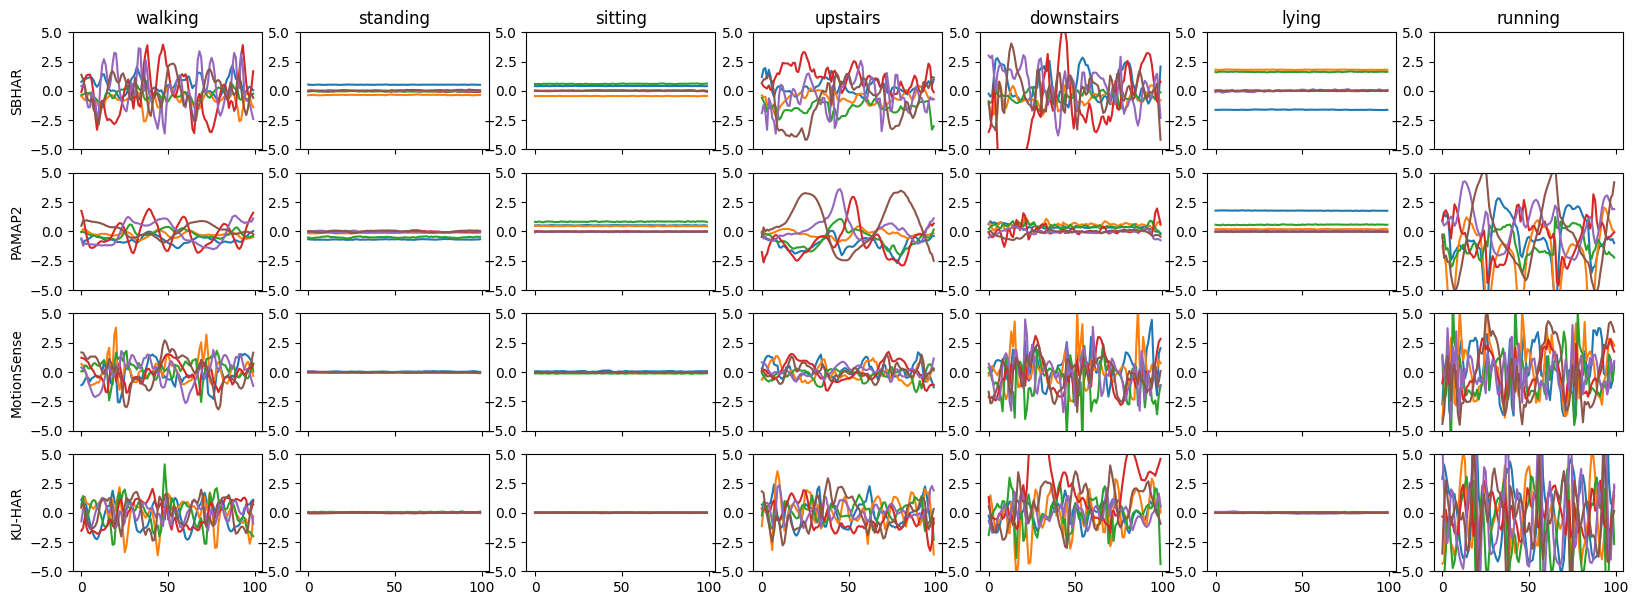

In [40]:
fig1, axarr = plt.subplots(len(data), n_classes, sharex=True, figsize=(20, 7))  # 4, 7
idx = 10

for i in range(len(data)):
    for j in range(n_classes):
        if len(ndata[j][i]) > 0:
            if np.shape(ndata[j][i][0])[-1] != 18:
                axarr[i][j].plot(ndata[j][i][0][idx][:,:6])  #axarr[i][j].plot(ndata[j][i][0][idx])
            else:
                axarr[i][j].plot(ndata[j][i][0][idx][:,:6])  #[:,:6]

        else:
            axarr[i][j].plot([])
        axarr[0][j].set_title(classn[j])
        axarr[i][j].set_ylim(-5, 5)
    axarr[i][0].set_ylabel(datan[i])
plt.show()

### 데이터 피클로 만들기

In [23]:
datan

['SBHAR', 'PAMAP2', 'MotionSense', 'KU-HAR']

In [24]:
classn

['walking',
 'standing',
 'sitting',
 'upstairs',
 'downstairs',
 'lying',
 'running']

In [25]:
def convert_to_one_hot(Y, C):
    Y = np.array(int(Y))
    Y = np.eye(C)[Y.reshape(-1)]
    return Y[0]

In [26]:
# 라벨 만드는 코드

nlabel = []   # train
nlabel2 = []  # test
for i in range(n_classes):  #7개
    temp_label = []
    temp_label2 = []
    label = convert_to_one_hot(i, n_classes)
    print('--------------------------------',classn[i], np.shape(ndata[i]))
    for j in range(len(ndata[i])):
        print(datan[j])
        print(np.shape(ndata[i][j]))
        print(np.shape(ndata2[i][j]))
        if np.shape(ndata[i][j])[0] == 0:
            temp_label.append([])
            temp_label2.append([])
            pass
        else:
            idx_ones = np.ones((np.shape(ndata[i][j][0])[0], 1))
            idx_ones2 = np.ones((np.shape(ndata2[i][j][0])[0], 1))
            print(np.shape(idx_ones * label))
            print(np.shape(idx_ones2 * label))
            print('**********',np.shape(ndata[i][j][0])[0]+ np.shape(ndata2[i][j][0])[0])
            temp_label.append(idx_ones * label)
            temp_label2.append(idx_ones2 * label)
    nlabel.append(temp_label)
    nlabel2.append(temp_label2)

-------------------------------- walking (4, 1)
SBHAR
(1, 929, 100, 6)
(1, 233, 100, 6)
(929, 7)
(233, 7)
********** 1162
PAMAP2
(1, 952, 100, 18)
(1, 238, 100, 18)
(952, 7)
(238, 7)
********** 1190
MotionSense
(1, 2746, 100, 6)
(1, 687, 100, 6)
(2746, 7)
(687, 7)
********** 3433
KU-HAR
(1, 1203, 100, 6)
(1, 301, 100, 6)
(1203, 7)
(301, 7)
********** 1504
-------------------------------- standing (4, 1)
SBHAR
(1, 1053, 100, 6)
(1, 264, 100, 6)
(1053, 7)
(264, 7)
********** 1317
PAMAP2
(1, 755, 100, 18)
(1, 189, 100, 18)
(755, 7)
(189, 7)
********** 944
MotionSense
(1, 2440, 100, 6)
(1, 611, 100, 6)
(2440, 7)
(611, 7)
********** 3051
KU-HAR
(1, 2420, 100, 6)
(1, 606, 100, 6)
(2420, 7)
(606, 7)
********** 3026
-------------------------------- sitting (4, 1)
SBHAR
(1, 969, 100, 6)
(1, 243, 100, 6)
(969, 7)
(243, 7)
********** 1212
PAMAP2
(1, 737, 100, 18)
(1, 185, 100, 18)
(737, 7)
(185, 7)
********** 922
MotionSense
(1, 2700, 100, 6)
(1, 675, 100, 6)
(2700, 7)
(675, 7)
********** 3375
KU

In [27]:
np.shape(nlabel), np.shape(ndata)

((7, 4), (7, 4))

In [28]:
np.shape(nlabel[0]), np.shape(nlabel[1]), np.shape(nlabel[2]), np.shape(nlabel[3]), np.shape(nlabel[4]), np.shape(nlabel[5]), np.shape(nlabel[6])

((4,), (4,), (4,), (4,), (4,), (4,), (4,))

In [29]:
np.shape(nlabel[0][0]), np.shape(nlabel[0][1]), np.shape(nlabel[0][2]), np.shape(nlabel[0][3])

((929, 7), (952, 7), (2746, 7), (1203, 7))

In [30]:
np.shape(ndata[0]), np.shape(ndata[1]), np.shape(ndata[2]), np.shape(ndata[3]), np.shape(ndata[4]), np.shape(ndata[5]), np.shape(ndata[6])

((4, 1), (4, 1), (4, 1), (4, 1), (4, 1), (4,), (4,))

In [31]:
np.shape(ndata[0][0]), np.shape(ndata[0][1]), np.shape(ndata[0][2]), np.shape(ndata[0][3])

((1, 929, 100, 6), (1, 952, 100, 18), (1, 2746, 100, 6), (1, 1203, 100, 6))

In [32]:
np.shape(nlabel[5][0]), np.shape(nlabel[5][1]), np.shape(nlabel[5][2]), np.shape(nlabel[5][3])

((1049, 7), (767, 7), (0,), (2108, 7))

In [33]:
np.shape(np.ones(np.shape(ndata[0][0][0][:, :, 0])))

(929, 100)

In [34]:
np.shape(np.ones(np.shape(ndata[0][0][0][:, :, :1])))

(929, 100, 1)

In [35]:
# 완성
for i in range(n_classes):  #7개
    print('--------------------------------',classn[i], np.shape(ndata[i]))
    for j in range(len(ndata[i])):
        print(j, datan[j])
        print(np.shape(ndata[i][j]))
        print(np.shape(ndata2[i][j]))
        print(np.shape(nlabel[i][j]))
        print(np.shape(nlabel2[i][j]))
        if np.shape(ndata[i][j])[0] == 1: 
            if j != 1:
                temp_data = ndata[i][j][0]
                temp_data2 = ndata2[i][j][0]
            else:
                temp_data = ndata[i][j][0][:, :, :6]  #손만
                temp_data2 = ndata2[i][j][0][:, :, :6]
            temp_class = np.ones(np.shape(ndata[i][j][0][:, :, :1]))*j
            temp_class2 = np.ones(np.shape(ndata2[i][j][0][:, :, :1]))*j
            temp_data_concat = np.concatenate((temp_data, temp_class), axis=2)
            temp_data_concat2 = np.concatenate((temp_data2, temp_class2), axis=2)

            temp_label = nlabel[i][j]
            temp_label2 = nlabel2[i][j]
            
            #print(np.shape(temp_label))
            #print(np.shape(temp_data), np.shape(temp_class), np.shape(temp_data_concat))
        
            if i == 0 and j == 0:
                all_data = temp_data_concat
                all_data2 = temp_data_concat2
                all_lable = temp_label
                all_lable2 = temp_label2
                print('***************',np.shape(all_data), np.shape(all_lable))
                print('***************',np.shape(all_data2), np.shape(all_lable2))
            else:
                all_data = np.vstack((all_data, temp_data_concat))
                all_data2 = np.vstack((all_data2, temp_data_concat2))
                all_lable = np.vstack((all_lable, temp_label))
                all_lable2 = np.vstack((all_lable2, temp_label2))
                print('***************',np.shape(all_data), np.shape(all_lable))
                print('***************',np.shape(all_data2), np.shape(all_lable2))
        else:
            pass
#         all_data.append(temp_data_concat)
#         all_lable.append(temp_label)

-------------------------------- walking (4, 1)
0 SBHAR
(1, 929, 100, 6)
(1, 233, 100, 6)
(929, 7)
(233, 7)
*************** (929, 100, 7) (929, 7)
*************** (233, 100, 7) (233, 7)
1 PAMAP2
(1, 952, 100, 18)
(1, 238, 100, 18)
(952, 7)
(238, 7)
*************** (1881, 100, 7) (1881, 7)
*************** (471, 100, 7) (471, 7)
2 MotionSense
(1, 2746, 100, 6)
(1, 687, 100, 6)
(2746, 7)
(687, 7)
*************** (4627, 100, 7) (4627, 7)
*************** (1158, 100, 7) (1158, 7)
3 KU-HAR
(1, 1203, 100, 6)
(1, 301, 100, 6)
(1203, 7)
(301, 7)
*************** (5830, 100, 7) (5830, 7)
*************** (1459, 100, 7) (1459, 7)
-------------------------------- standing (4, 1)
0 SBHAR
(1, 1053, 100, 6)
(1, 264, 100, 6)
(1053, 7)
(264, 7)
*************** (6883, 100, 7) (6883, 7)
*************** (1723, 100, 7) (1723, 7)
1 PAMAP2
(1, 755, 100, 18)
(1, 189, 100, 18)
(755, 7)
(189, 7)
*************** (7638, 100, 7) (7638, 7)
*************** (1912, 100, 7) (1912, 7)
2 MotionSense
(1, 2440, 100, 6)
(1, 61

In [36]:
np.shape(all_data), np.shape(all_lable)

((31851, 100, 7), (31851, 7))

In [37]:
np.shape(all_data2), np.shape(all_lable2)

((7976, 100, 7), (7976, 7))

In [38]:
fn_pickle = './pickle/all_data_23.pickle'

datasave = [None] * 6
datasave[0] = all_data
datasave[1] = all_lable
datasave[2] = all_data2
datasave[3] = all_lable2
datasave[4] = datan
datasave[5] = classn
print('Saving...')
file = open(fn_pickle, 'wb')
pickle.dump(datasave, file)
file.close()
print('-------------------------------------------')
print('Saved raw files : {}'.format(fn_pickle))
print('-------------------------------------------')

Saving...
-------------------------------------------
Saved raw files : ../pickle/all_data_23.pickle
-------------------------------------------
